<a href="https://colab.research.google.com/github/Zarboagus/Cooder/blob/main/Variables_clim%C3%A1ticas_buenos_aire_zarbo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (21.8 MB)


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
import os
drive.mount('/content/drive')
# Establesco ruta
import os
print(os.getcwd())
os.chdir("/content/drive/My Drive")
print(os.getcwd())
import pandas_profiling

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
/content/drive/My Drive


In [19]:
historico = pd.read_csv('Histórico Clima.csv',sep=',')
df = pd.DataFrame.from_dict(historico)
df.head()

,año,mes,máxima,mínima,media,mm,días
0,1991,Enero,28.4,19.8,24.10,190.0,7
1,1991,Febrero,27.8,17.8,22.80,30.5,6
2,1991,Marzo,27.6,18.4,23.00,55.0,8
3,1991,Abril,22.4,13.6,18.00,125.6,12
4,1991,Mayo,20.7,12.2,16.45,68.4,7


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df.count()

año       354
mes       354
máxima    354
mínima    354
media     354
mm        354
días      354
dtype: int64

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
año,354.0,2005.254237,8.530419,1991.00,1998.0000,2005.000,2013.000,2020.0
máxima,354.0,22.956780,5.107615,12.60,18.5000,22.850,27.700,32.5
mínima,354.0,13.853107,4.496836,4.60,10.1250,13.700,18.100,21.7
media,354.0,18.404929,4.776078,8.95,14.2125,18.275,22.900,27.0
mm,354.0,105.403107,74.275866,0.40,48.8250,90.900,144.575,421.0
días,354.0,9.714689,3.602872,1.00,7.0000,10.000,12.000,23.0


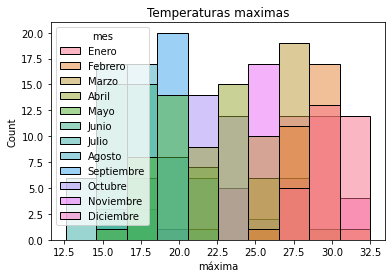

In [23]:
sns.histplot(data=df,x='máxima',hue='mes') 
plt.title('Temperaturas maximas')
plt.show()

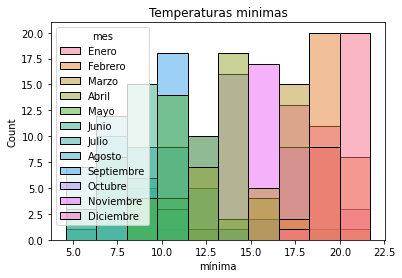

In [24]:
sns.histplot(data=df,x='mínima',hue='mes') 
plt.title('Temperaturas minimas')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mapa de Calor Maximas y Minimas')

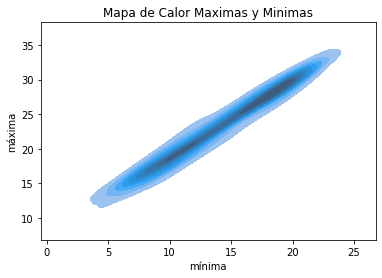

In [25]:
sns.kdeplot(df['mínima'],df['máxima'],shade=True)
plt.title('Mapa de Calor Maximas y Minimas')

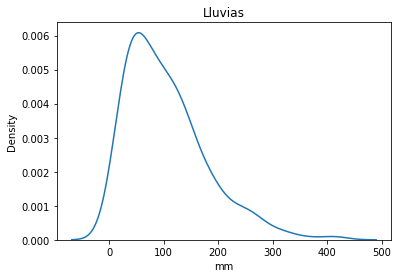

In [26]:
sns.kdeplot(data=df,x='mm',) 
plt.title('Lluvias')
plt.show()

In [27]:
profile = pandas_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
df = df.replace(["Enero"],1)
df = df.replace(["Febrero"],2)
df = df.replace(["Marzo"],3)
df = df.replace(["Abril"],4)
df = df.replace(["Mayo"],5)
df = df.replace(["Junio"],6)
df = df.replace(["Julio"],7)
df = df.replace(["Agosto"],8)
df = df.replace(["Septiembre"],9)
df = df.replace(["Octubre"],10)
df = df.replace(["Noviembre"],11)
df = df.replace(["Diciembre"],12)

In [29]:
print(df)

      año  mes  máxima  mínima  media     mm  días
0    1991    1    28.4    19.8  24.10  190.0     7
1    1991    2    27.8    17.8  22.80   30.5     6
2    1991    3    27.6    18.4  23.00   55.0     8
3    1991    4    22.4    13.6  18.00  125.6    12
4    1991    5    20.7    12.2  16.45   68.4     7
..    ...  ...     ...     ...    ...    ...   ...
349  2020    2    29.6    19.3  24.45   66.2     4
350  2020    3    28.6    20.1  24.35  158.3    11
351  2020    4    22.8    13.6  18.20   87.2     7
352  2020    5    20.4    11.0  15.70   22.6     4
353  2020    6    16.9     9.1  13.00   89.2     9

[354 rows x 7 columns]


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df.dtypes

año         int64
mes         int64
máxima    float64
mínima    float64
media     float64
mm        float64
días        int64
dtype: object

In [32]:
df.count()

año       354
mes       354
máxima    354
mínima    354
media     354
mm        354
días      354
dtype: int64

In [33]:
# Mapping máxima 
df.loc[ df['máxima'] <= 20, 'máximaEncoded']                         = 0
df.loc[(df['máxima'] > 20) & (df['máxima'] <= 25), 'máximaEncoded'] = 1
df.loc[(df['máxima'] > 25) & (df['máxima'] <= 30), 'máximaEncoded'] = 2
df.loc[(df['máxima'] > 30) & (df['máxima'] <= 35), 'máximaEncoded'] = 3
df.loc[(df['máxima'] > 35) & (df['máxima'] <= 45), 'máximaEncoded'] = 4
 
# Mapping mínima
df.loc[ df['mínima'] <= 10, 'mínimaEncoded']                         = 0
df.loc[(df['mínima'] > 10) & (df['mínima'] <= 15), 'mínimaEncoded'] = 1
df.loc[(df['mínima'] > 15) & (df['mínima'] <= 20), 'mínimaEncoded'] = 2
df.loc[(df['mínima'] > 20) & (df['mínima'] <= 25), 'mínimaEncoded'] = 3
df.loc[(df['mínima'] > 25), 'mínimaEncoded'] = 4

# Mapping mm
df.loc[ df['mm'] <= 20, 'mmEncoded']                         = 0
df.loc[(df['mm'] > 20) & (df['mm'] <= 50), 'mmEncoded'] = 1
df.loc[(df['mm'] > 50) & (df['mm'] <= 100), 'mmEncoded'] = 2
df.loc[(df['mm'] > 100) & (df['mm'] <= 150), 'mmEncoded'] = 3
df.loc[(df['mm'] > 150) & (df['mm'] <= 200), 'mmEncoded'] = 4
df.loc[(df['mm'] > 200) & (df['mm'] <= 250), 'mmEncoded'] = 5
df.loc[(df['mm'] > 250) & (df['mm'] <= 300), 'mmEncoded'] = 6
df.loc[ df['mm'] > 300, 'mmEncoded'] = 7

# Mapping días
df.loc[ df['días'] <= 3, 'díasEncoded']                         = 0
df.loc[(df['días'] > 3) & (df['días'] <= 7), 'díasEncoded'] = 1
df.loc[(df['días'] > 7) & (df['días'] <= 10), 'díasEncoded'] = 2
df.loc[(df['días'] > 10) & (df['días'] <= 15), 'díasEncoded'] = 3
df.loc[(df['días'] > 15) & (df['días'] <= 21), 'díasEncoded'] = 4
df.loc[(df['días'] > 21), 'díasEncoded'] = 5

In [34]:
drop_elements = ['días','mm','máxima','mínima',]
df_encoded = df.drop(drop_elements, axis = 1)

In [35]:
df_encoded.head()

,año,mes,media,máximaEncoded,mínimaEncoded,mmEncoded,díasEncoded
0,1991,1,24.10,2.0,2.0,4.0,1.0
1,1991,2,22.80,2.0,2.0,1.0,1.0
2,1991,3,23.00,2.0,2.0,2.0,2.0
3,1991,4,18.00,1.0,1.0,3.0,3.0
4,1991,5,16.45,1.0,1.0,2.0,1.0


In [36]:
X = df_encoded.drop(["díasEncoded"], axis=1) 
y = df_encoded["díasEncoded"]

In [37]:
X

,año,mes,media,máximaEncoded,mínimaEncoded,mmEncoded
0,1991,1,24.10,2.0,2.0,4.0
1,1991,2,22.80,2.0,2.0,1.0
2,1991,3,23.00,2.0,2.0,2.0
3,1991,4,18.00,1.0,1.0,3.0
4,1991,5,16.45,1.0,1.0,2.0
...,...,...,...,...,...,...
349,2020,2,24.45,2.0,2.0,2.0
350,2020,3,24.35,2.0,3.0,4.0
351,2020,4,18.20,1.0,1.0,2.0
352,2020,5,15.70,1.0,1.0,1.0


In [38]:
y

0      1.0
1      1.0
2      2.0
3      3.0
4      1.0
      ... 
349    1.0
350    3.0
351    1.0
352    1.0
353    2.0
Name: díasEncoded, Length: 354, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42) 

In [40]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier(max_depth=2, random_state=42) 

In [41]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [42]:
X_test.head()

,año,mes,media,máximaEncoded,mínimaEncoded,mmEncoded
220,2009,5,16.35,1.0,1.0,1.0
42,1994,7,11.40,0.0,0.0,2.0
286,2014,11,20.90,2.0,2.0,6.0
181,2006,2,24.15,2.0,2.0,5.0
56,1995,9,15.50,0.0,1.0,1.0


In [43]:
y_test_pred = tree.predict(X_test) 
y_test_pred

array([1., 2., 3., 3., 2., 2., 2., 2., 2., 3., 2., 2., 2., 1., 2., 2., 2.,
       3., 2., 3., 2., 3., 2., 2., 1., 2., 3., 2., 2., 2., 2., 2., 2., 2.,
       2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 3., 3., 2., 2., 2., 1., 2., 2., 3., 2., 2., 2., 2., 2.,
       1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 2.,
       2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2.,
       2., 3., 2., 2., 1., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 2.,
       2., 2., 2., 2., 2., 2.])

In [44]:
X_test['Prediccion categoria de dias']=y_test_pred
X_test

,año,mes,media,máximaEncoded,mínimaEncoded,mmEncoded,Prediccion categoria de dias
220,2009,5,16.35,1.0,1.0,1.0,1.0
42,1994,7,11.40,0.0,0.0,2.0,2.0
286,2014,11,20.90,2.0,2.0,6.0,3.0
181,2006,2,24.15,2.0,2.0,5.0,3.0
56,1995,9,15.50,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...
81,1997,10,17.60,1.0,1.0,3.0,2.0
248,2011,9,16.10,1.0,1.0,0.0,2.0
262,2012,11,22.40,2.0,2.0,3.0,2.0
176,2005,9,14.15,0.0,0.0,2.0,2.0


In [45]:
y_test

220    3.0
42     2.0
286    3.0
181    2.0
56     1.0
      ... 
81     3.0
248    0.0
262    2.0
176    3.0
179    2.0
Name: díasEncoded, Length: 142, dtype: float64

In [46]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_test_pred)
print('% :',test_accuracy)

% : 0.4295774647887324


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[ 0,  0,  1,  0,  0],
       [ 0,  7, 27,  1,  0],
       [ 0,  4, 46,  5,  0],
       [ 0,  3, 32,  8,  0],
       [ 0,  0,  6,  2,  0]])

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.50      0.20      0.29        35
         2.0       0.41      0.84      0.55        55
         3.0       0.50      0.19      0.27        43
         4.0       0.00      0.00      0.00         8

    accuracy                           0.43       142
   macro avg       0.28      0.24      0.22       142
weighted avg       0.43      0.43      0.37       142



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model = RandomForestClassifier(random_state=42, n_estimators=100,
                               class_weight="balanced", max_features="auto")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [51]:
X_test=X_test.drop(columns=['Prediccion categoria de dias'])

In [52]:
X_test.head()

,año,mes,media,máximaEncoded,mínimaEncoded,mmEncoded
220,2009,5,16.35,1.0,1.0,1.0
42,1994,7,11.40,0.0,0.0,2.0
286,2014,11,20.90,2.0,2.0,6.0
181,2006,2,24.15,2.0,2.0,5.0
56,1995,9,15.50,0.0,1.0,1.0


In [53]:
y_test_pred = model.predict(X_test)
y_test_pred

array([1., 2., 3., 3., 2., 3., 2., 2., 3., 3., 3., 2., 2., 1., 2., 2., 3.,
       3., 3., 3., 2., 3., 3., 4., 1., 2., 3., 1., 2., 3., 3., 2., 3., 3.,
       3., 3., 3., 3., 3., 2., 3., 2., 3., 2., 3., 1., 2., 1., 2., 3., 1.,
       1., 2., 2., 3., 4., 2., 1., 2., 2., 3., 2., 3., 2., 2., 3., 1., 3.,
       1., 2., 3., 1., 2., 1., 3., 3., 2., 3., 3., 2., 2., 2., 3., 2., 1.,
       2., 1., 1., 2., 3., 1., 3., 3., 2., 1., 1., 3., 3., 2., 1., 2., 3.,
       3., 4., 2., 1., 1., 1., 3., 3., 3., 2., 1., 3., 3., 2., 3., 3., 2.,
       3., 2., 1., 3., 3., 3., 3., 1., 2., 3., 3., 3., 2., 2., 3., 3., 3.,
       2., 2., 1., 2., 3., 2.])

In [54]:
test_accuracy = accuracy_score(y_test, y_test_pred)

print('%',test_accuracy) 

% 0.43661971830985913


In [56]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42) 

In [57]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier(max_depth=2, random_state=42) 

In [58]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [59]:
y_train_pred = tree.predict(X_train) 
y_test_pred = tree.predict(X_test) 

In [60]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('probabilidad', train_accuracy)
print('probabilidad',test_accuracy)

probabilidad 0.4858490566037736
probabilidad 0.4295774647887324


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


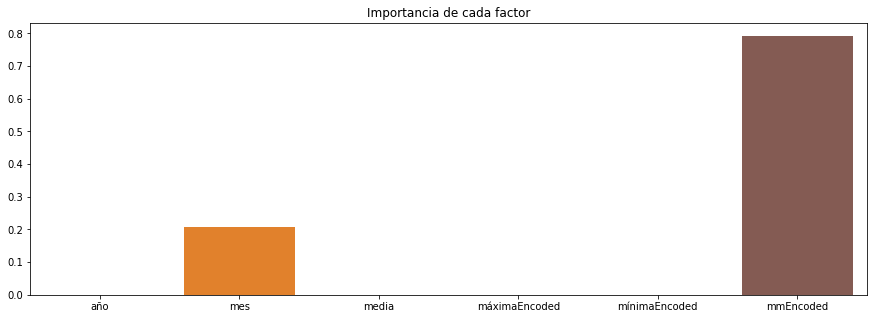

In [61]:
plt.figure(figsize=(15,5))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada factor')
plt.show()

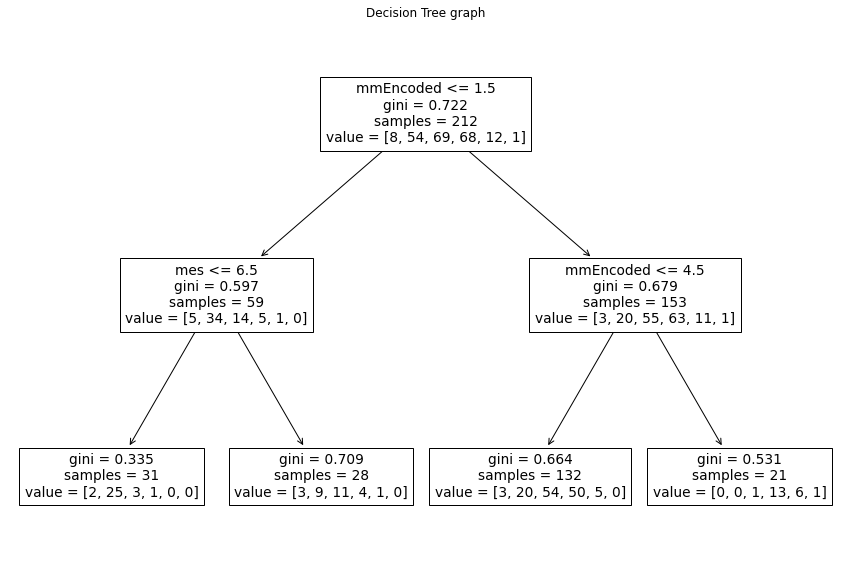

In [62]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(tree, feature_names=X.columns)
plt.title('Decision Tree graph')
plt.show()